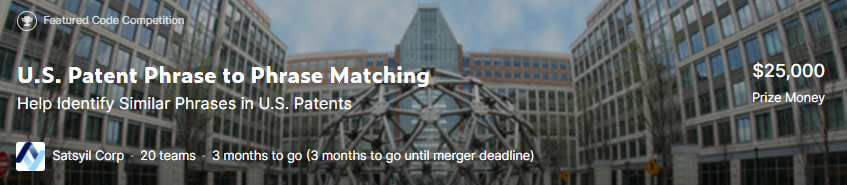

### Another natural language competition. This one is also difficult to understand.
### I am having trouble with the CPC code, which is a CPC code.

また自然言語コンペです。これまたわかりにくい。<br>
 CPCコードというのが困ったものです。

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Import</span>

In [ ]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import os
import gc
from tqdm.notebook import tqdm
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from transformers import *

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Train</span>

In [ ]:
train = pd.read_csv('../input/us-patent-phrase-to-phrase-matching/train.csv')
train

In [ ]:
train.anchor.value_counts()

In [ ]:
train.context.unique()

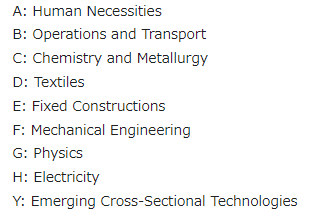

In [ ]:
train.hist()

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Test</span>

In [ ]:
test = pd.read_csv('../input/us-patent-phrase-to-phrase-matching/test.csv')
test

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">SentenceTransformers Documentation</span>

In [ ]:
!cp -r ../input/sentencetransformer/sentence-transformers /tmp/st
!pip install /tmp/st

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('../input/sentence/all-MiniLM-L6-v2')

### I don't know, I'll read one line and convert it.

わからないので１行読んで変換してみます

In [ ]:
embeddings = model.encode(train.loc[0,'target'])

In [ ]:
data =[]
for  embedding in embeddings:
    data.append(embedding)
np.mean(data)

### The numbers came out as if they were far from the score.
まるでスコアとはかけ離れた数字がでてきました。

### Let's put this unfamiliar number into train data.
このよくわからない数字をtrainデータにいれてみます。

In [ ]:
label={}
for i,d  in enumerate(train.context.unique()):
    label.update({d:i})

In [ ]:
train['con'] = train['context'].apply(lambda x: label[x])
test['con'] = test['context'].apply(lambda x: label[x])

In [ ]:
anchor={}
for i,d  in enumerate(train.anchor.unique()):
    anchor.update({d:i})

In [ ]:
train['anc'] = train['anchor'].apply(lambda x: anchor[x])
test['anc'] = test['anchor'].apply(lambda x: anchor[x])

In [ ]:
anchors = train.anchor.values
targets = train.target.values
embedding1 = model.encode(anchors)
embedding2 = model.encode(targets) 

In [ ]:
train['embedding1'] =np.mean(embedding1,axis=1)
train['embedding2'] =np.mean(embedding2,axis=1)

In [ ]:
anchors = test.anchor.values
targets = test.target.values
embedding1 = model.encode(anchors)
embedding2 = model.encode(targets) 

In [ ]:
test['embedding1'] =np.mean(embedding1,axis=1)
test['embedding2'] =np.mean(embedding2,axis=1)

In [ ]:
train1 = train[['con','embedding1','embedding2','anc']]
test1 = test[['con','embedding1','embedding2','anc']]
y = train.score

### I don't know how to solve it, so I'll try LGBM as well.
解法がわからないので、LGBMでもやってみます。

In [ ]:
import lightgbm as lgb

In [ ]:
reg = lgb.LGBMRegressor(n_estimators=150) 
reg.fit(train1, y)

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Submittion</span>

In [ ]:
sub = pd.read_csv('../input/us-patent-phrase-to-phrase-matching/sample_submission.csv')
sub.score =reg.predict(test1)
sub

In [ ]:
sub.to_csv('submission.csv',index=False)